# Hopfield Network

Hopfield networks, named after John Hopfield, have been around since the 1980s. They allow a network to retrieve associative memory (or content addressable memory). This is different from how computers retrieve memory, using a stored location to look up memory. To overly simplify it, content addressable memory works by the network recalling the memory based on features of the memory. Hopfield networks act like a recurrent neural network. Since the early days these networks have been improved and the newer models are known as Modern Hopfield Networks or Dense Associative Memories. This notebook simply covers the original network. It's a useful tool in gaining an understanding of more advanced neural networks such as recurrent neural networks without becoming overwhelming.

## How it works

A Hopfield network store states using a matrix of weights. The weight matrix is symmetrical and has zeros along the leading diagonal if the network is binary. Hopfield networks have a measure of the energy in the network, and when that energy has stabilized, the weights will help us recover memories stored in the network

To have a pretty good grasp of what's taking place in the network it's not really necessary to go deep into the math behind it. I'll briefly go over some of the math, then provide a simple example. A more detailed explanation is found a little further down.

## Algorithm

The binary Hopfield network algorithm is as follows:
1. A network is trained to store a set number of memories
    - In this notebook we take the given memories as a matrix of column vectors of images of shape $MxN$
    - Create a weight matrix of shape $MxM$, storing each weight as the sum of inner product of the input matrix rows and columns for each memory $\mu$ divided by $N$, the number of neurons per memory (in our case we have a 5x6 image so we have 30 neurons)
    - $\frac{1}{N}\sum_{\mu = 1}^M x_{\mu, i}x_{\mu, j}$ where $w \ne i$
2. The network is given a corrupted memory in the same form as the input for training the weights
3. The network iterates over the memories, updating them until the network converges or reaches some stopping point
    - The iterative process consists of:
    - Creating a copy of the corrupted memories
    - Calculating some temporary variable $z$ as the previous values of the corrupted memory + the inner product of the rows of the previous values of the corrupted memory and columns of the weights matrix
    - $\sum w_{ij}x_j$
    - This value is then passed through a sgn function where 
    $sgn(z) = \begin{cases}
   > 0 & 1\\    
   \leq 0 & -1   
\end{cases}$
    - The new memory is then updated to be this value
    - After all of the corrupted memory has been iterated over and updated the previous corrupted memory is updated to this updated memory and the process repeats, using the new value of the corrupted memory for calculations and updates
4. The recovered/restored memories are returned

### Simple example

Say we have a memory represented as 
$x = 
\begin{bmatrix}
1 && 1 \\ 
0 && 0 \\ 
1 && 1 \\
1 && 0 \\
1 && 1 \\
\end{bmatrix}
$ 
and we want to store it in our Hopfield network. We would build a weight matrix $W$ which will be a 4x4 matrix (4 is the length of a memory in the memory vector). To construct $W$ we would perform the following:

- Replace all 0s with -1s
- $W = \frac{1}{N}\sum_{\mu = 1}^M x_{\mu, j}x_{\mu, i}$ where $w \ne i$
- $M=2$ because we have 2 memories (column vectors)
- $N=5$ because we have 5 pieces of information in the memory
- $W_{j,i} = \frac{1}{5}\sum_{\mu = 1}^2 x_{\mu, j}x_{\mu, i}$

$x = 
\begin{bmatrix}
1 && 1 \\ 
-1 && -1 \\ 
1 && 1 \\
1 && -1 \\
1 && 1 \\
\end{bmatrix}
$ 


$W =
\begin{bmatrix}
0 && \frac{1}{5}\sum_{\mu = 1}^2 x_{0}x_{1} && \frac{1}{5}\sum_{\mu = 1}^2 x_{0}x_{2} && \frac{1}{5}\sum_{\mu = 1}^2 x_{0}x_{3} && \frac{1}{5}\sum_{\mu = 1}^2 x_{0}x_{4} \\ 
\frac{1}{5}\sum_{\mu = 1}^2 x_{1}x_{0} && 0 && \frac{1}{5}\sum_{\mu = 1}^2 x_{1}x_{2} && \frac{1}{5}\sum_{\mu = 1}^2 x_{1}x_{3} && \frac{1}{5}\sum_{\mu = 1}^2 x_{1}x_{4}  \\
\frac{1}{5}\sum_{\mu = 1}^2 x_{2}x_{0} && \frac{1}{5}\sum_{\mu = 1}^2 x_{2}x_{1} && 0 && \frac{1}{5}\sum_{\mu = 1}^2 x_{2}x_{3} && \frac{1}{5}\sum_{\mu = 1}^2 x_{2}x_{4} \\
\frac{1}{5}\sum_{\mu = 1}^2 x_{3}x_{0} && \frac{1}{5}\sum_{\mu = 1}^2 x_{3}x_{1} && \frac{1}{5}\sum_{\mu = 1}^2 x_{3}x_{2} && 0 && \frac{1}{5}\sum_{\mu = 1}^2 x_{3}x_{4} \\
\frac{1}{5}\sum_{\mu = 1}^2 x_{4}x_{0} && \frac{1}{5}\sum_{\mu = 1}^2 x_{4}x_{1} && \frac{1}{5}\sum_{\mu = 1}^2 x_{4}x_{2} && \frac{1}{5}\sum_{\mu = 1}^2 x_{4}x_{3} && 0 \\
\end{bmatrix}
$


Row 1
- $W_{0,0} = 0$ because $w=i$ 
- $W_{0,1} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[-1*-1 + -1*1] = -0.4$
- $W_{0,2} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[-1*1 + 1*-1] = 0.4$
- $W_{0,3} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[-1*1 + 1*-1] = 0$
- $W_{0,3} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[-1*1 + 1*-1] = 0.4$

Row 2
- $W_{1,0} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[-1*-1+ -1*-1] = -0.4$
- $W_{1,1} = 0$
- $W_{1,2} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[-1*1 + -1*-1] = -0.4$
- $W_{1,3} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[-1*1 + -1*-1] = 0$
- $W_{1,4} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[-1*1 + -1*-1] = -0.4$

Row 3
- $W_{2,0} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*-1 + -1*-1] = 0.4$
- $W_{2,1} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*-1 + -1*-1] = -0.4$
- $W_{2,2} = 0$
- $W_{2,3} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*1 + -1*-1] = 0$
- $W_{2,4} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*1 + -1*-1] = 0.4$

Row 4
- $W_{3,0} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*-1 + -1*1] = 0$
- $W_{3,1} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*-1 + -1*-1] = 0$
- $W_{3,2} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*1 + -1*-1] = 0$
- $W_{3,3} = 0$
- $W_{3,4} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*1 + -1*-1] = 0$

Row 5
- $W_{4,0} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*-1 + -1*1] = 0.4$
- $W_{4,1} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*-1 + -1*-1] = -0.4$
- $W_{4,2} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*1 + -1*-1] = 0.4$
- $W_{4,3} = 0$
- $W_{4,4} = \frac{1}{5}[x_{1, j}x_{1, i} + [x_{2, j}x_{2, i}] = \frac{1}{5}[1*1 + -1*-1] = 0$


$W = 
\begin{bmatrix}
0 && -0.4 && 0.4 && 0 && 0.4 \\ 
-0.4 && 0 && -0.4 && 0 && -0.4\\
0.4 && -0.4 && 0 && 0 && 0.4\\
0 && 0 && 0 && 0 && 0\\
0.4 && -0.4 && 0.4 && 0 && 0\\
\end{bmatrix}
$

Now that the weights are set we can input a corrupted version of one of the inputs and let the network recover the uncorrupted version that was stored in the network. We'll take the second memory, 
$X_1\begin{bmatrix}
1 && 0 && 1 && 0 && 1
\end{bmatrix}
$
, alter it by changing the first, fourth, and fifth elements so that $X_1'\begin{bmatrix}
0 && 0 && 1 && 1 && 0
\end{bmatrix}
$, and then pass it into the network, iterate through the algorithm, and output our uncorrupted memory.

To update the memory we need to complete all updates for the current iteration using the values we start the iteration with. The Hopfield network design has a delay built in that keeps this from getting confusing. We'll update all values of our corrupted input using the values we started the iteration with. After a round of iteration we use our updated values for the next round.

We start with the first element in $X_1'$

$Xn+1_{i,j} = sgn(Xn_{i,j}' + Xn_j'^T \dot W_i)$

$Xn+1_{0,0} = 0 + 
\begin{bmatrix}0 && 0 && 1 && 1 && 0\end{bmatrix}
 \begin{bmatrix}
0 \\ -0.4 \\ 0.4 \\ 0 \\ 0.4 \\ 
\end{bmatrix}
= 0 + (0*0+0*-0.4+1*0.4+1*0+0*0.4) = 0.4$
$$sgn(0.4) = 1$$

$Xn+1_{0,1} = 0 + 
\begin{bmatrix}0 && 0 && 1 && 1 && 0\end{bmatrix}
 \begin{bmatrix}
-0.4 \\ 0 \\ -0.4 \\ 0 \\ -0.4\\
\end{bmatrix}
= 0 + (0*-0.4+0*0+1*-0.4+1*0+0*-0.4) = 0$
$$sgn(0) = -1$$

$Xn+1_{0,2} = 0 + 
\begin{bmatrix}0 && 0 && 1 && 1 && 0\end{bmatrix}
 \begin{bmatrix}
0.4 \\ -0.4 \\ 0 \\\\ 0 \\ 0.4\\
\end{bmatrix}
= 1 + (0*0.4+0*-0.4+1*0+1*0+0*0.4) = 0$
$$sgn(0) = -1$$

$Xn+1_{0,3}= 0 + 
\begin{bmatrix}0 && 0 && 1 && 1 && 0\end{bmatrix}
 \begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 0\\
\end{bmatrix}
= 0 + (0*0+0*0+0*0+0*0+0*0) = 0$
$$sgn(0) = -1$$

$Xn+1_{0,4}= 0 + 
\begin{bmatrix}0 && 0 && 1 && 1 && 0\end{bmatrix}
 \begin{bmatrix}
0.4 \\ -0.4 \\ 0.4 \\ 0 \\ 0\\
\end{bmatrix}
= 0 + (0*0.4+0*-0.4+1*0.4+1*0+0*0) = 0.4$
$$sgn(0.4) = 1$$

$X_{n+1} = \begin{bmatrix} 1 && -1 && -1 && -1 && 1\end{bmatrix}$

Now we check for convergence. Because we changed 0s to -1s we'll need to apply the opposite, so all -1s become 0s. Now we see that $X_{n+1} \ne X_1$. We repeat this using the newly updated $X_{n+1}$ as $X'$


Round 2 of iteration

$Xn+1_{0,0} = 1 + 
\begin{bmatrix}-1 && -1 && -1 && -1 && 1\end{bmatrix}
 \begin{bmatrix}
0 \\ -0.4 \\ 0.4 \\ 0 \\ 0.4 \\ 
\end{bmatrix}
= 1 + (-1*0+-1*-0.4+-1*0.4+-1*0+1*0.4) = 0.4$
$$sgn(1.4) = 1$$

$Xn+1_{0,1} = -1 + 
\begin{bmatrix}-1 && -1 && -1 && -1 && 1\end{bmatrix}
 \begin{bmatrix}
-0.4 \\ 0 \\ -0.4 \\ 0 \\ -0.4\\
\end{bmatrix}
= -1 + (-1*-0.4+-1*0+-1*-0.4+v*0+1*-0.4) = 0.4$
$$sgn(-0.6) = -1$$

$Xn+1_{0,2} = -1 + 
\begin{bmatrix}1 && -1 && -1 && -1 && 1\end{bmatrix}
 \begin{bmatrix}
0.4 \\ -0.4 \\ 0 \\\\ 0 \\ 0.4\\
\end{bmatrix}
= -1 + (1*0.4+-1*-0.4+-1*0+-1*0+1*0.4) = 0.2$
$$sgn(0.2) = 1$$

$Xn+1_{0,3}= -1 + 
\begin{bmatrix}1 && -1 && -1 && -1 && 1\end{bmatrix}
 \begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 0\\
\end{bmatrix}
= 0$
$$sgn(0) = -1$$

$Xn+1_{0,4}= 1 + 
\begin{bmatrix}1 && -1 && -1 && -1 && 1\end{bmatrix}
 \begin{bmatrix}
0.4 \\ -0.4 \\ 0.4 \\ 0 \\ 0\\
\end{bmatrix}
= 1 + (1*0.4+-1*-0.4+-1*0.4+-1*0+-1*0) = 1.4$
$$sgn(1.4) = 1$$

$X_{n+1} = \begin{bmatrix}1 && -1 && 1 && -1 && 1\end{bmatrix}$

We check for convergence and after swapping -1s for 0s we see we have converged. 

$X_{n+1} = X_1 = \begin{bmatrix}1 && 0 && 1 && 0 && 1\end{bmatrix}$.


### More math

If you feel you understand what's happening you can skip this section. If you'd like to learn a little more about why this works you can continue reading.

Artificial neural networks attempt to mimick what researchers believe is happening in the brain, namely, when some threshold is reached, neurons fire. In our Hopfield network, all neurons are connected to all other neurons, and when they are activated they fire. Each one can be represented as its own state space dynamics. $F$ can be a vector of functions that represent the state space dynamics for the neurons in the network, so if we have If we say $x= \begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_m\end{bmatrix}$, it would look something like this $F=\begin{bmatrix} F_1 \\ F_2 \\ \vdots \\ F_m \end{bmatrix}$ where $F_1$ models the first neuron, etc.

You could model neurons in many ways, but for this notebook we'll use 

$c_i \frac{dv_i(t)}{dt} = - \frac{V_i(t)}{R_i}  + \sum_{j=1}^m w_{ij} \phi_j (v_j(t) + I_j(t)$

With $\phi_i(V_it) = x_i$

Where:
- $C_i$ is the output
- $V_i$
- $R_i$
- $W$
- $\phi$ is the activation function 
- $t$ is time as our functions model the state changes across time

To learn when the network is stable would allow us to learn the weights. This can be done by finding the first order derivative of each function in $F$ and setting it to $0$ for all functions in $F$. These would be stored in a Jacobian matrix. We want a vector of values that would make the derivative of each function equal to 0.

$ J = \begin{bmatrix}\frac{dx_1}{dt} = F_1(x_1,x_2,\dots,x_m) \\ 
\frac{dx_2}{dt} = F_2(x_1,x_2,\dots,x_m) \\ 
\vdots \\ 
\frac{dx_m}{dt} = F_m(x_1,x_2,\dots,x_m) \end{bmatrix}$



The activation function we'll use is $tanh(\alpha x)$, where a is a tunable parameter. As $\alpha$ goes to infinity it transforms the tanh function into a step function, and we can use the sgn function to replicate this behavior. $Tanh(\alpha x)$ is used because we need a function that is continuous and differentiable everywhere, and we also need an inverse to exist. The inverse of $\phi_i(x_i) = tanh(\alpha x)$ is $\phi_i^{-1}(x_i) = - \frac{1}{\alpha_i} ln \frac{1 - x_i}{1 + x_i}$

Using this activation function we can calculate the energy of the Hopfield network using the Lyapunov function for Hopfield networks, given as

$E = - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m w_{ji} x_j x_i + \sum_{j=1}^m \frac{1}{R_j} \int_0^{x_j} \phi_j^{-1}(x)dx - \sum_{j=1}^m I_j x_j$

This looks like a lot but its becomes simpler.

$\frac{dE}{dt} = - \sum_{j=1}^m \frac{dE}{dx_j} \frac{dx_j}{dt}$

$\frac{dE}{dt} = - \sum_{j=1}^m (\sum_{j=1}^m w_{ji} x_i - \frac{V_j}{R_j} + I_j) \frac{dx_j}{dt}$

And we know $C_j \frac{dV_j}{dt} = \sum_{j=1}^m w_{ji} x_i - \frac{V_j}{R_j} + I_j$

So now we have $\frac{dE}{dt} = - \sum_{j=1}^m C_j \frac{dV_j}{dt} \frac{dx_j}{dt}$

We'll rewrite inserting $V_J = \phi_j^{-1}(x_j)$ 

$\frac{dE}{dt} = - \sum_{j=1}^m C_j (\frac{d}{dt} \phi_j^{-1} (x_j)) \frac{dx_j}{dt}$

We know that $\frac{dE}{dt} = 0$ when $\frac{dx_j}{dt} = 0$ $\forall j$, which lets us simplify to the following equation.

For a binary Hopfield network, the energy can me measured by $E = - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m w_{ji} x_i x_j$

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.cm as cm

np.random.seed(0)

In [182]:
def make_digits():
    """makes simple binary digits in 6,5 grid"""
    digits = {k:np.ones((6,5)) for k in range(10) }
    digits[0][0,1:-1] = 0
    digits[0][-1,1:-1] = 0
    digits[0][1:-1,0] = 0
    digits[0][1:-1,-1] = 0
    digits[1][0,1] = 0
    digits[1][:,2] = 0
    digits[2][0,:-2] = 0
    digits[2][3,1:-2] = 0
    digits[2][-1,1:] = 0
    digits[2][1:3,3] = 0
    digits[2][3:,1] = 0
    digits[3][0,1:-1] = 0
    digits[3][2,2:] = 0
    digits[3][4,1:-1] = 0
    digits[3][1:-2,-1] = 0
    digits[4][3,:] = 0
    digits[4][:4,0] = 0
    digits[4][:,-2] = 0
    digits[5][0,:] = 0
    digits[5][2,:-1] = 0
    digits[5][-1,:-1] = 0
    digits[5][:3,0] = 0
    digits[5][2:,-2] = 0
    digits[6][:,0] = 0
    digits[6][2:,-1] = 0
    digits[6][2,:] = 0
    digits[6][-1,:] = 0
    digits[7][0,:-1] = 0
    digits[7][:,-2] = 0
    digits[8][1,1:-1] = 0
    digits[8][-1,1:-1] = 0
    digits[8][3,:] = 0
    digits[8][2:5,0] = 0
    digits[8][2:5,-1] = 0
    digits[9][0,:] = 0
    digits[9][3,:] = 0
    digits[9][:4,0] = 0
    digits[9][:,-1] = 0
    
    return digits

In [183]:
digits = make_digits()

In [184]:
def plot_each_digit(d, num):
    """plots digits in dataset
    params:
        d: digits dict
        num: tup() of rows and columns
    """
    
    row, col = num
    fig, axes = plt.subplots(row, col, figsize = (6,3))
    
    i = 0
    for r in range(row):
        for c in range(col):
            if i < int(row*col):
                if type(d) == dict:
                    img = d[i]
                elif type(d) == np.ndarray:
                    img = d[:,i].reshape(6,5)
                plt.subplot(row, col, i+1)
                plt.imshow(img, cmap = cm.Greys_r)
                plt.title(f"Digit {i}")
                i+=1
    plt.tight_layout()
    plt.show()

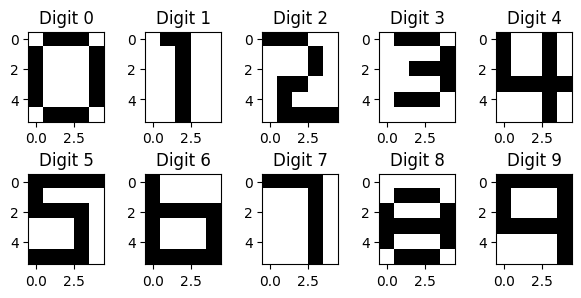

In [185]:
plot_each_digit(digits, (2,5))

In [186]:
def add_noise(d, pix):
    """ adds noise to array (img)
    flips 2 pixels at random
    params:
        d: digit to add noise to
    returns:
        noisy_d: digit with added noise
    """
    
    n, m = d.shape
    img_flat = d.flatten().copy()
    pixels = np.random.choice(range(len(img_flat)), size = pix, replace = False)
    for p in pixels:
        if img_flat[p] == 0:
            img_flat[p] = 1
        elif img_flat[p] == 1:
            img_flat[p] = 0

    return img_flat.reshape(n, m)

In [187]:
def make_data(d, nums, noise = False, **kwargs):
    """creates noisy images
    params:
        d: dataset of digits
        nums: list() of numbers to select
        noise: bool to add noise, default False
        **kwargs:
            pix: number of pixels to flip
    returns:
        noisy_lst: list() of noisy image arrays
    """
    
    pix = kwargs.get('pix', 2)
    
    if type(nums) != list:
            nums = [nums]

    if not noise:
        data = [d[x].flatten() for x in d.keys() if x in nums]    
    else:
        data = [add_noise(d[x], pix).flatten() for x in d.keys() if x in nums]

    return np.c_[data].T

In [188]:
def show_img(imgs):
    """shows the recovered images
    params:
        imgs: array of images, stored as column vectors
    returns:
        None: plots images
    """

    n, m = imgs.shape
    row, col = 1, m
    if m > 4:
        f1, f2 = 6, 6
    else:
        f1, f2 = 3, 3
    fig, axes = plt.subplots(row, col, figsize = (f1,f2))
    
    i = 0
    for r in range(row):
        for c in range(col):
            if i < int(row*col):
                img = imgs[:,i].reshape(6,5)
                plt.subplot(row, col, i+1)
                plt.imshow(img, cmap = cm.Greys_r)
                plt.title(f"Digit {i}")
                i+=1
    plt.tight_layout()
    plt.show()

In [194]:
class HopfieldNet():
    def __init__(self, x, **kwargs):
        self.binary = kwargs.get("binary", True) # if false network is bipolar
        self.epochs = kwargs.get("epochs", 10)
        self.x = x # enter array of imgs, each img column vector
        self.N = self.x.shape[0] # 30
        self.w = self.init_weights()
        self.a = 1e3
        self.threshold = 0.
    
    
    def init_weights(self):
        """stores weights, just the pixel values 1, or -1 (if 0) for each image input
        weights are used to recover corrupted images"""

        n, m = self.x.shape

        # change 0 to -1 in input images
        tmp = self.x.copy()
        tmp[tmp == 0] = -1
        w = np.zeros_like(self.x @ self.x.T)

        # design weights to store memories
        for i in range(n):
            for j in range(n):
                w[i,j] = tmp[i].T @ tmp[j]
        if self.binary:
            np.fill_diagonal(w, 0)

        return w / self.N
    
    
    def activate(self, x):
        """sng activation function
        technically tanh(ax) with a = inf in order to turn this into sgn function
        """
      
        if x > 0:
            return 1
        else:
            return -1

    
    def recover(self, imgs, tmp_imgs):
        """
        updates pixel values for corrupted memories
        sums wijxj before passing thru sgn function
        x[i,j] = sgn(x[i,j] + w[i,j]x[:,j])
        params:
            imgs: np.ndarray() each image as column vector of pixel values
            tmp_imgs: np.ndarray() each image as column vector of pixel values
            --both inputs are equal, 1 is updated while the other is held constant for this function--
        returns:
            imgs: np.ndarray() each image as column vector of pixel values
            tmp_imgs: np.ndarray() each image as column vector of pixel values
        """

        n, m = imgs.shape

        for i in range(n):
            for j in range(m):
                z = tmp_imgs[i,j] + imgs[:,j].T @ self.w[:,i]
                tmp_imgs[i,j] = self.activate(z)
                
        return tmp_imgs


    def buffer(self, lst, x):
        """inserts new results into position one of buffer list of previous outcomes
        params:
            lst: current list of last 5 pixel updates
            x: latest update of pixels
        returns:
            lst: list(), updated buffer
        """
        
        x_ = x.copy()
        if self.binary:
            x_[x_ == -1] = 0
        
        if len(lst) < 10:
            lst.append(x_)
        else:
            lst.insert(0,x_)
            lst.pop(-1)
        
        return lst
        
    
    def iterate(self, imgs_in):
        """recovers uncorrupted memory
        iterates, updating pixel values for corrupted memories (imgs_in) 
        imgs_in = tmp_imgs.copy() takes care of the delay feature in Hopfield nets
        params:
            imgs_in: np.ndarray() matrix of images, each image a column vector of pixels
        returns:
            tmp_imgs: output of the restoration of memories, np.ndarray
        """

        if type(imgs_in) != np.ndarray:
            imgs_in = np.array(imgs_in)

        e = 0
        tmp_imgs = np.zeros((imgs_in.shape))
        diff_lst = []
        
        while e < self.epochs:
            tmp_imgs = self.recover(imgs_in, tmp_imgs)
            diff_lst = self.buffer(diff_lst, tmp_imgs)
            if len(diff_lst) > 10:
                if np.allclose(tmp_imgs, diff_lst[-1], rtol=1e-1, atol=1e-1):
                    print(f"Recovered in {e+1} iterations")
                    break
            imgs_in = tmp_imgs[:]
            e += 1
        
        tmp_imgs[tmp_imgs == -1] = 0
        
        return tmp_imgs


In [195]:
def run_experiment(network, data, bad_data, verbose = True, abs_err = False):
    """runs experiment, train model, insert images with noise and attempt to restore 10x, recording results
    params:
        network: hopfield network, already trained
        data: uncorrupted data used to train network
        bad_data: corrupted data entered into network to be recovered
        verbose: print to screen during experiment
        abs_err: pixel to pixel error
    returns:
        error_perc: percent of successful restoration
        abs_error: pixel to pixel error
    """
    
    if verbose:
        print("Corrupted data")
        show_img(bad_data)
    
    results = []
    abs_errors = []
    n = 10
    num_digits = data.shape[1]
    counts = np.zeros((1,num_digits))

    for i in range(n):
        recovered = network.iterate(bad_data)
        diff = abs(np.sum(data - recovered))
        abs_errors.append(diff)
        if diff != 0.:
            specific_nums = abs(np.sum(abs(data - recovered), axis = 0))
            specific_nums[specific_nums != 0] = 1
            counts += specific_nums
            
    abs_error = np.mean(abs_errors)
    error_perc = np.round(100*(1 - (np.sum(counts)/(n*num_digits))), 2)
    
    if verbose:
        print(f"Correctly recovered individual memories {error_perc}% of the time over {n} separate runs.")
        print("Specifically:")
        for k in range(counts.shape[1]):
            print(f"Recovered digit {k} correctly {int(n - np.squeeze(counts)[k])} times")
        print("Restored data on final iteration:")
        show_img(recovered)
    
    if abs_err:
        return error_perc, abs_error
    
    return error_perc

### a - 
*Create a weight matrix to store only digits '0' and '1' in the network as shown in the following figure. Then randomly change 2 pixels of each digit and apply the noisy digits to the network. Then iterate the network. Repeat this process 10 times and record the percentage of times in which the correct patterns (without noise) are produced.*

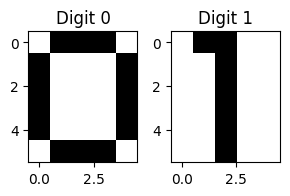

In [196]:
# the digits to train weights on
data1 = make_data(digits, [0,1])
show_img(data1)

# data with added noise
data1_noise = make_data(digits, [0,1], noise = True)

h = HopfieldNet(data1, epochs = 1e2)

Corrupted data


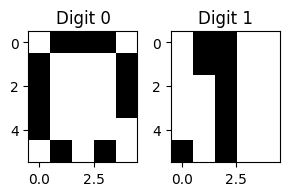

Correctly recovered individual memories 100.0% of the time over 10 separate runs.
Specifically:
Recovered digit 0 correctly 10 times
Recovered digit 1 correctly 10 times
Restored data on final iteration:


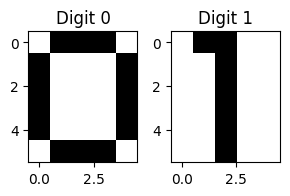

100.0

In [197]:
run_experiment(h, data1, data1_noise)

### b - 
*Repeat part a but this time change 4 and 6 pixels in each pattern.*

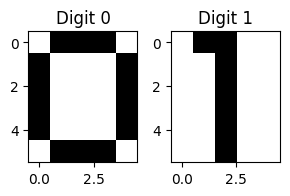

In [200]:
# the digits to train weights on
numbers = [0,1]
data2 = make_data(digits, numbers)
show_img(data2)

# 4 pixel added noise
data2a_noise = make_data(digits, numbers, noise = True, pix = 4)
# 6 pixel added noise
data2b_noise = make_data(digits, numbers, noise = True, pix = 6)

h = HopfieldNet(data2, epochs = 1e2, binary = False)

Corrupted data


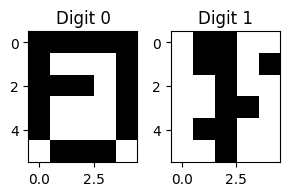

Correctly recovered individual memories 100.0% of the time over 10 separate runs.
Specifically:
Recovered digit 0 correctly 10 times
Recovered digit 1 correctly 10 times
Restored data on final iteration:


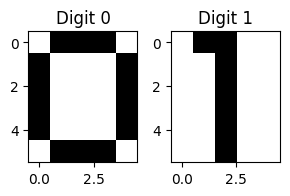

100.0

In [201]:
# 4 pixels changed
run_experiment(h, data2, data2a_noise)

Corrupted data


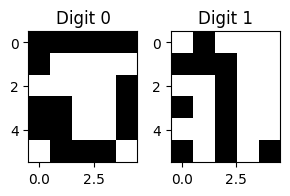

Correctly recovered individual memories 100.0% of the time over 10 separate runs.
Specifically:
Recovered digit 0 correctly 10 times
Recovered digit 1 correctly 10 times
Restored data on final iteration:


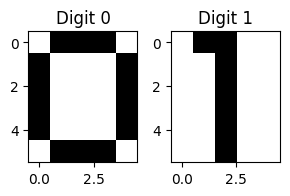

100.0

In [202]:
# 6 pixels changed
run_experiment(h, data2, data2b_noise)

### c - 
*Repeat parts a and b but this time store digits '0', '1', and '2' in the network.*

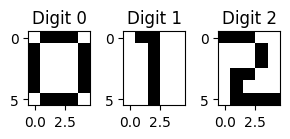

In [16]:
# the digits to train weights on
numbers = [0,1,2]
data3 = make_data(digits, numbers)
show_img(data3)

# 2 pixel added noise
data3a_noise = make_data(digits, numbers, noise = True, pix = 2)
# 4 pixel added noise
data3b_noise = make_data(digits, numbers, noise = True, pix = 4)
# 6 pixel added noise
data3c_noise = make_data(digits, numbers, noise = True, pix = 6)

h = HopfieldNet(data3, epochs = 1e2)

Corrupted data


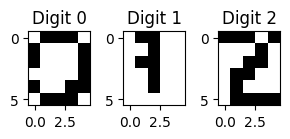

Correctly recovered individual memories 66.67% of the time over 10 separate runs.
Specifically:
Recovered digit 0 correctly 10 times
Recovered digit 1 correctly 10 times
Recovered digit 2 correctly 0 times
Restored data on final iteration:


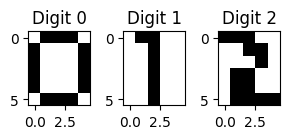

66.67

In [17]:
# 2 pixels
run_experiment(h, data3, data3a_noise)

Corrupted data


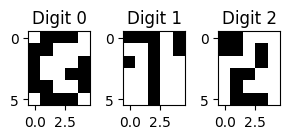

Correctly recovered individual memories 100.0% of the time over 10 separate runs.
Specifically:
Recovered digit 0 correctly 10 times
Recovered digit 1 correctly 10 times
Recovered digit 2 correctly 10 times
Restored data on final iteration:


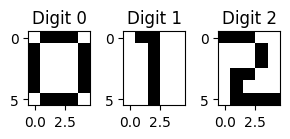

100.0

In [18]:
# 4 pixels
run_experiment(h, data3, data3b_noise)

Corrupted data


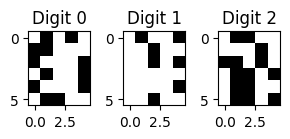

Correctly recovered individual memories 33.33% of the time over 10 separate runs.
Specifically:
Recovered digit 0 correctly 0 times
Recovered digit 1 correctly 10 times
Recovered digit 2 correctly 0 times
Restored data on final iteration:


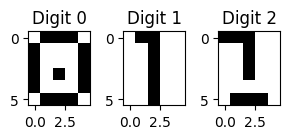

33.33

In [19]:
# 6 pixels changed
run_experiment(h, data3, data3c_noise)

### d - 
*Repeat parts a and b but this time store digits'0', '1', ...,'6' in the network.*

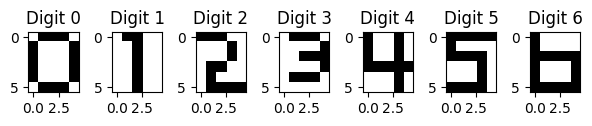

In [20]:
# the digits to train weights on
numbers = list(range(7))
data4 = make_data(digits, numbers)
show_img(data4)

# 4 pixel added noise
data4a_noise = make_data(digits, numbers, noise = True, pix = 2)
data4b_noise = make_data(digits, numbers, noise = True, pix = 4)
data4c_noise = make_data(digits, numbers, noise = True, pix = 6)

h = HopfieldNet(data4, epochs = 1e4)

Corrupted data


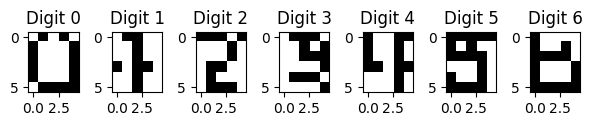

Correctly recovered individual memories 0.0% of the time over 10 separate runs.
Specifically:
Recovered digit 0 correctly 0 times
Recovered digit 1 correctly 0 times
Recovered digit 2 correctly 0 times
Recovered digit 3 correctly 0 times
Recovered digit 4 correctly 0 times
Recovered digit 5 correctly 0 times
Recovered digit 6 correctly 0 times
Restored data on final iteration:


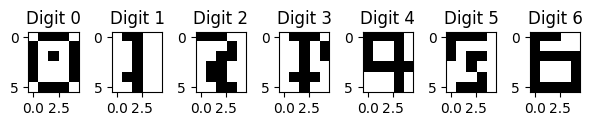

0.0

In [21]:
# 2 pixels
run_experiment(h, data4, data4a_noise)

Corrupted data


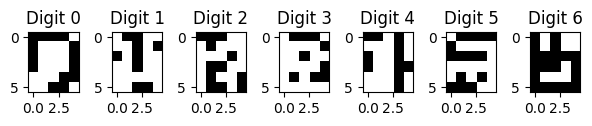

Correctly recovered individual memories 14.29% of the time over 10 separate runs.
Specifically:
Recovered digit 0 correctly 0 times
Recovered digit 1 correctly 10 times
Recovered digit 2 correctly 0 times
Recovered digit 3 correctly 0 times
Recovered digit 4 correctly 0 times
Recovered digit 5 correctly 0 times
Recovered digit 6 correctly 0 times
Restored data on final iteration:


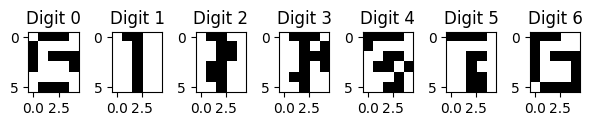

14.29

In [22]:
# 4 pixels
run_experiment(h, data4, data4b_noise)

Corrupted data


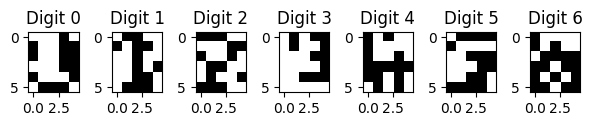

Correctly recovered individual memories 14.29% of the time over 10 separate runs.
Specifically:
Recovered digit 0 correctly 0 times
Recovered digit 1 correctly 0 times
Recovered digit 2 correctly 0 times
Recovered digit 3 correctly 0 times
Recovered digit 4 correctly 0 times
Recovered digit 5 correctly 0 times
Recovered digit 6 correctly 10 times
Restored data on final iteration:


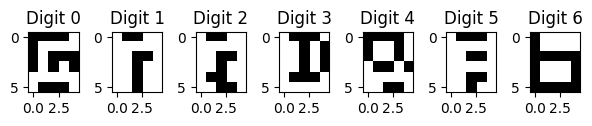

14.29

In [23]:
# 6 pixels
run_experiment(h, data4, data4c_noise)

### e -
*Plot three curves showing the percentage of error versus the number of digits stored, one curve for 2 pixel errors, one curve for 4 pixel errors and one curve for 6 pixel errors.*

In [24]:
def run_part_e():
    """runs model for 1 to all 10 digits along with 2, 4, 6 pixel errors
    returns:
        results_dict: percentage of error vs number of digits stored for each of 3 pixel error categories
        errors_dict: avg number of wrong pixels for each of 3 pixel error categories
    """
    
    results_dict = {2:{x:[] for x in range(10)}, 
                    4:{x:[] for x in range(10)}, 
                    6:{x:[] for x in range(10)}}
    errors_dict = {2:{x:[] for x in range(10)}, 
                   4:{x:[] for x in range(10)}, 
                   6:{x:[] for x in range(10)}}
    
    for i in range(10):
        numbers = list(range(i+1))
        data = make_data(digits, numbers)
        lr = 1e2
        if i > 3:
            lr = 1e3
        elif i > 6:
            lr = 1e4
        h = HopfieldNet(data, epochs = lr)

        # added noise
        noise = [make_data(digits, numbers, noise = True, pix = x) for x in sorted(results_dict.keys())]
        
        for j in range(1, len(noise)+1):
            k = int(j*2)
            perc_err, abs_err = run_experiment(h, data, noise[j-1], verbose = False, abs_err = True)
            results_dict[k][i].append(perc_err)
            errors_dict[k][i].append(abs_err)

    return results_dict, errors_dict

In [25]:
def plot_part_e(d):
    """plots the percentage of correct restoration vs number of digits stored
    params:
        d: dict of results
        num: number of pixels flipped (keys to d)
    returns:
        None: plot
    """

    for i in sorted(d.keys()):
        results_for_plot = {k:v for k,v in d[i].items()}
        x = [x + 1 for x in sorted(results_for_plot.keys())]
        y = [v for k,v in sorted(results_for_plot.items())]
        plt.plot(x, y, label = f"{i} pixels flipped")
    plt.title(f"Percentage of errors vs number of digits stored for 2, 4, 6 pixels flipped")
    plt.xlabel("Number of digits stored")
    plt.ylabel("Percentage of time correctly restored")
    plt.legend()
    plt.show()

In [26]:
results, errors = run_part_e()

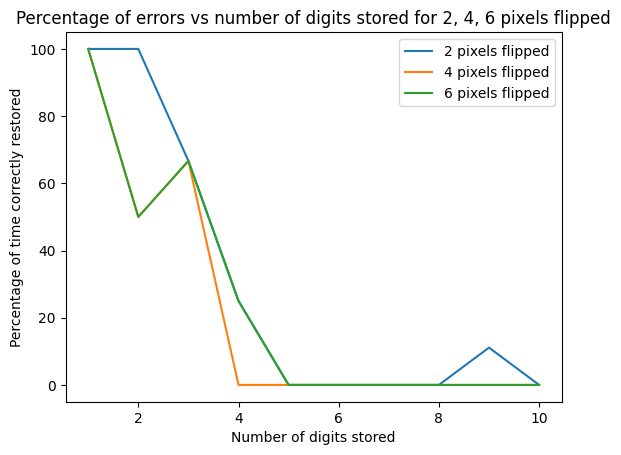

In [27]:
plot_part_e(results)

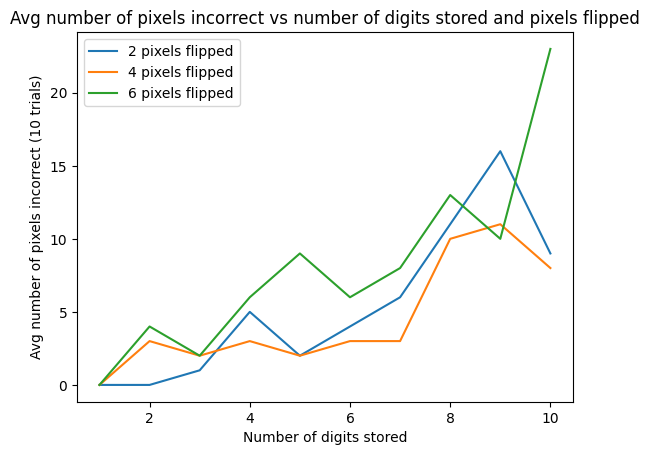

In [28]:
for i in sorted(errors.keys()):
    results_for_plot = {k:v for k,v in errors[i].items()}
    x = [x + 1 for x in sorted(results_for_plot.keys())]
    y = [v for k,v in sorted(results_for_plot.items())]
    plt.plot(x, y, label = f"{i} pixels flipped")
plt.title(f"Avg number of pixels incorrect vs number of digits stored and pixels flipped")
plt.xlabel("Number of digits stored")
plt.ylabel("Avg number of pixels incorrect (10 trials)")
plt.legend()
plt.show()

### Summary

From the experiments we can see that as the number of digits stored increases, so does the error in restoring pixels. At 8 stored digits there appears to be a rather large jump in the average number of pixels incorrectly recovered.

As long as the signal to noise ratio, $\frac{N}{M}$, is low, the network should be stable. Its reciprical, the load parameter, has a point where the memory recall breaks down at $\frac{M}{N} = 0.14$. Storing 5 memories we get $\frac{M}{N} = 0.138$, and 6 memories we get $\frac{M}{N} = 0.166$, so the network should be relatively stable storing 5 memories before seeing significant errors. This appears to be a good estimate of where the network beings to fail, as we see the network is unable to restore memories once it stores 4-5 digits. The plot is rather similar for flipping 2, 4, and 6 pixels, with slight variations between them.